The dataset contains data on Pokemon, including their 
1. Name, name of the pokemon
2. Type 1										
3. Type 2
4. Total
5. HP
6. Attack
7. Defense
8. Sp. Atk
9. Sp. Def
10. Speed
11. Generation
12. Legendary

The idea is to present the clustering of Pokemon depending on similarities in their statistics and predict which pokemon falls under which cluster. Hence we end up with a dataset in the form presented below.

In [745]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [746]:
# read the dataset
pokemon = pd.read_csv("C:\\Users\\nikhi\\OneDrive\\Desktop\\Social Prachar\\Final Projects\\Clustering\\Pokemon.csv")
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Shape of data = 800 rows × 13 columns

In [747]:
# data types of the columns
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [748]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [749]:
# missing values
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Type 2 has 386 missing values nearly half the rows, better to drop the column rather than replacing with mode

In [750]:
# dropping #, Name cols as they are serial & descriptional cols respectively and Type 2 has nearly half missing values 
del pokemon['#']
del pokemon['Name']
del pokemon['Type 2']

In [751]:
# change dtype of Legendary col to int
pokemon['Legendary'] = pokemon['Legendary'].astype(np.int)

<ipython-input-751-bb4dd536fc95>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pokemon['Legendary'] = pokemon['Legendary'].astype(np.int)


In [752]:
pokemon

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,0
1,Grass,405,60,62,63,80,80,60,1,0
2,Grass,525,80,82,83,100,100,80,1,0
3,Grass,625,80,100,123,122,120,80,1,0
4,Fire,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,Rock,600,50,100,150,100,150,50,6,1
796,Rock,700,50,160,110,160,110,110,6,1
797,Psychic,600,80,110,60,150,130,70,6,1
798,Psychic,680,80,160,60,170,130,80,6,1


In [753]:
# count of unique values in each col
pokemon.nunique()

Type 1         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

Skills = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total'>

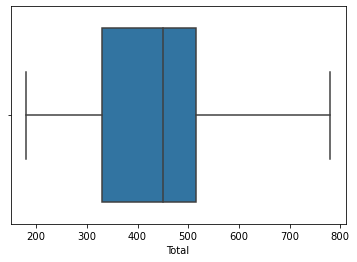

In [754]:
# handling outliers
sns.boxplot(pokemon['Total'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP'>

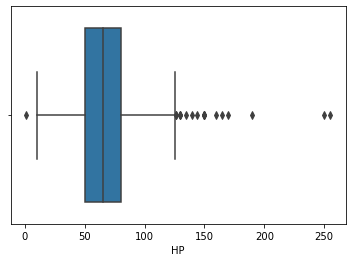

In [755]:
sns.boxplot(pokemon['HP'])

In [756]:
q1 = pokemon['HP'].quantile(0.25)
q3 = pokemon['HP'].quantile(0.75)
IQR = q3-q1
IQR

30.0

In [757]:
ul_hp = q3 + 1.5*IQR
ll_hp = q1 - 1.5*IQR
ll_hp, ul_hp 

(5.0, 125.0)

In [758]:
pokemon[pokemon['HP']<ll_hp].count()['HP'], pokemon[pokemon['HP']>ul_hp].count()['HP']

(1, 18)

In [759]:
pokemon['HP'] = np.where(pokemon['HP'] < ll_hp, ll_hp, pokemon['HP'])
pokemon['HP'] = np.where(pokemon['HP'] > ul_hp, ul_hp, pokemon['HP'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack'>

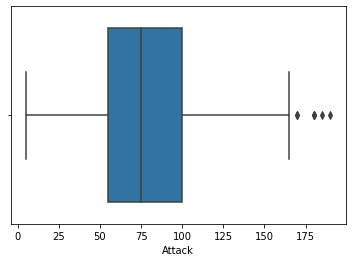

In [760]:
sns.boxplot(pokemon['Attack'])

In [761]:
q1 = pokemon['Attack'].quantile(0.25)
q3 = pokemon['Attack'].quantile(0.75)
IQR = q3-q1
IQR

45.0

In [762]:
ul_at = q3 + 1.5*IQR
ll_at = q1 - 1.5*IQR
ll_at, ul_at

(-12.5, 167.5)

In [763]:
pokemon[pokemon['Attack']<ll_at].count()['Attack'], pokemon[pokemon['Attack']>ul_at].count()['Attack']

(0, 7)

In [764]:
pokemon['Attack'] = np.where(pokemon['Attack'] > ul_at, ul_at, pokemon['Attack'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Defense'>

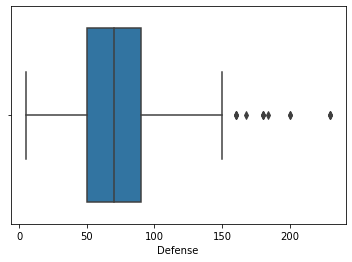

In [765]:
sns.boxplot(pokemon['Defense'])

In [766]:
q1 = pokemon['Defense'].quantile(0.25)
q3 = pokemon['Defense'].quantile(0.75)
IQR = q3-q1
IQR

40.0

In [767]:
ul_df = q3 + 1.5*IQR
ll_df = q1 - 1.5*IQR
ll_df, ul_df

(-10.0, 150.0)

In [768]:
pokemon[pokemon['Defense']<ll_df].count()['Defense'], pokemon[pokemon['Defense']>ul_df].count()['Defense']

(0, 13)

In [769]:
pokemon['Defense'] = np.where(pokemon['Defense'] > ul_df, ul_df, pokemon['Defense'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sp. Atk'>

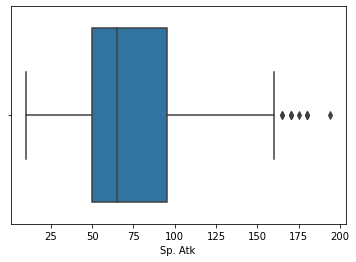

In [770]:
sns.boxplot(pokemon['Sp. Atk'])

In [771]:
q1 = pokemon['Sp. Atk'].quantile(0.25)
q3 = pokemon['Sp. Atk'].quantile(0.75)
IQR = q3-q1
IQR

45.25

In [772]:
ul_sa = q3 + 1.5*IQR
ll_sa = q1 - 1.5*IQR
ll_sa, ul_sa

(-18.125, 162.875)

In [773]:
pokemon[pokemon['Sp. Atk']<ll_sa].count()['Sp. Atk'], pokemon[pokemon['Sp. Atk']>ul_sa].count()['Sp. Atk']

(0, 10)

In [774]:
pokemon['Sp. Atk'] = np.where(pokemon['Sp. Atk'] > ul_sa, ul_sa, pokemon['Sp. Atk'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sp. Def'>

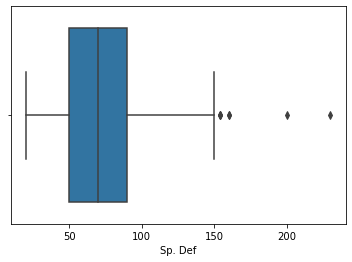

In [775]:
sns.boxplot(pokemon['Sp. Def'])

In [776]:
q1 = pokemon['Sp. Def'].quantile(0.25)
q3 = pokemon['Sp. Def'].quantile(0.75)
IQR = q3-q1
IQR

40.0

In [777]:
ul_sd = q3 + 1.5*IQR
ll_sd = q1 - 1.5*IQR
ll_sd, ul_sd

(-10.0, 150.0)

In [778]:
pokemon[pokemon['Sp. Def']<ll_sd].count()['Sp. Def'], pokemon[pokemon['Sp. Def']>ul_sd].count()['Sp. Def']

(0, 7)

In [779]:
pokemon['Sp. Def'] = np.where(pokemon['Sp. Def'] > ul_sd, ul_sd, pokemon['Sp. Def'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed'>

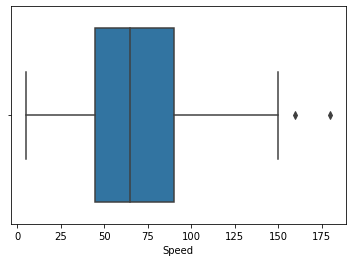

In [780]:
sns.boxplot(pokemon['Speed'])

In [781]:
q1 = pokemon['Speed'].quantile(0.25)
q3 = pokemon['Speed'].quantile(0.75)
IQR = q3-q1
IQR

45.0

In [782]:
ul_sp = q3 + 1.5*IQR
ll_sp = q1 - 1.5*IQR
ll_sp, ul_sp

(-22.5, 157.5)

In [783]:
pokemon[pokemon['Speed']<ll_sp].count()['Speed'], pokemon[pokemon['Speed']>ul_sp].count()['Speed']

(0, 2)

In [784]:
pokemon['Speed'] = np.where(pokemon['Speed'] > ul_sp, ul_sp, pokemon['Speed'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Generation'>

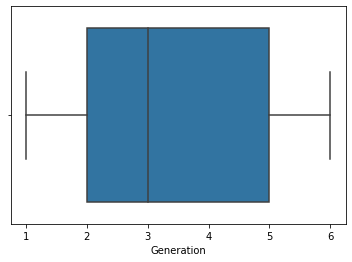

In [785]:
sns.boxplot(pokemon['Generation'])

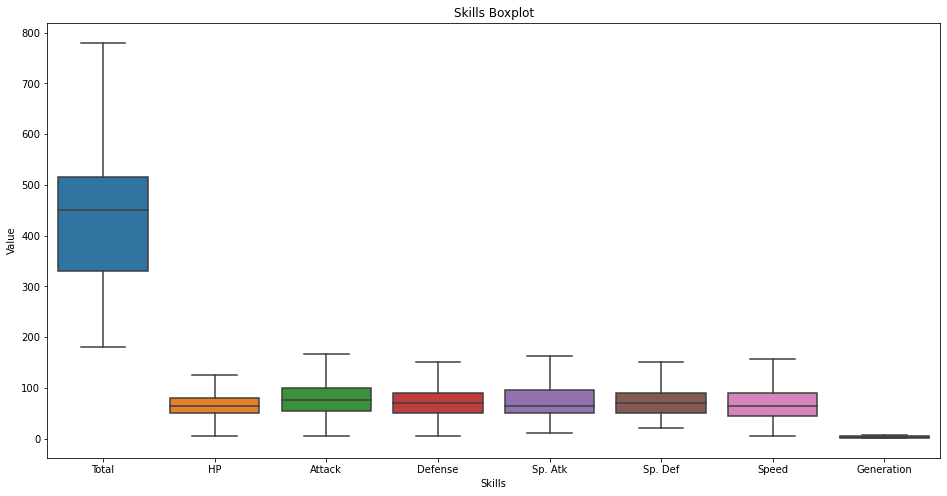

In [786]:
# after outliers treatment
BoxPlotPkdex = pd.melt(pokemon, 
               id_vars = ["Type 1"], 
               value_vars = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", 'Generation'])

plt.figure(figsize=(16,8))
ax = sns.boxplot(x="variable", y="value", data=BoxPlotPkdex)
plt.title("Skills Boxplot")
plt.xlabel("Skills")
plt.ylabel("Value");

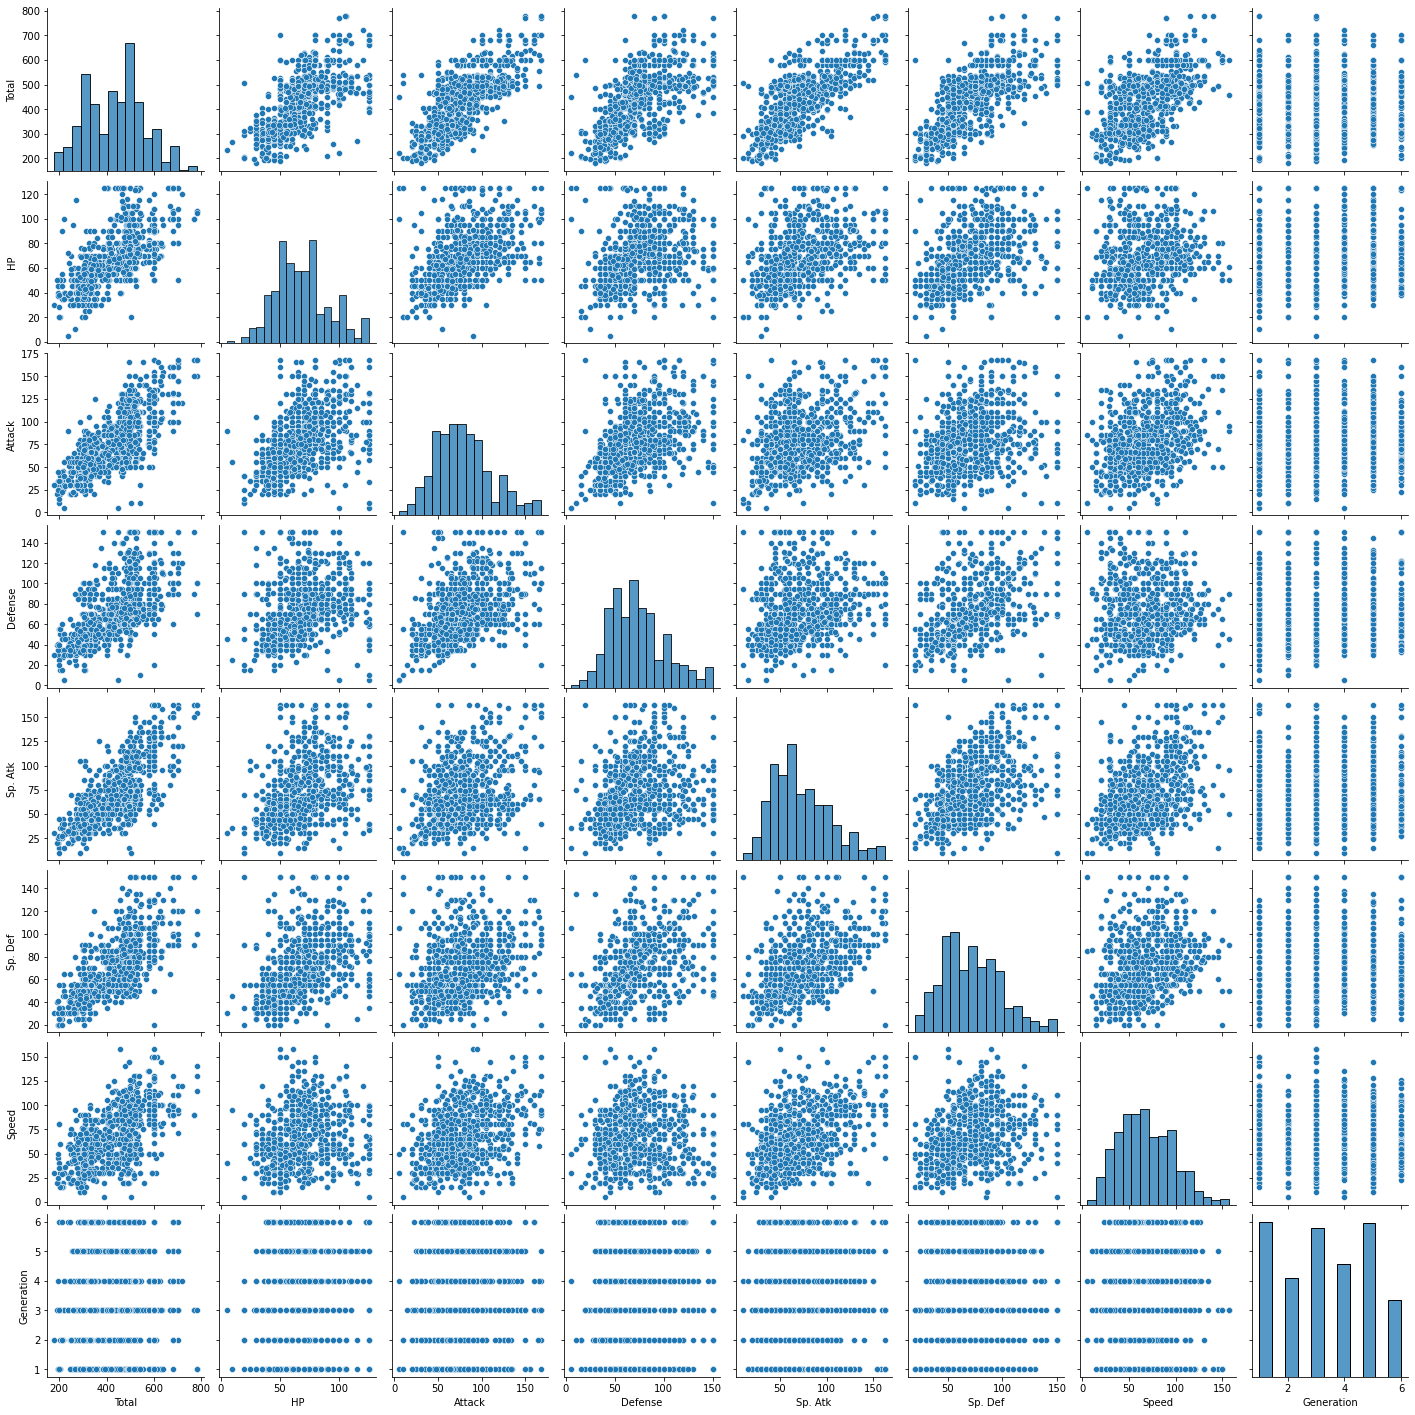

In [787]:
sns.pairplot(pokemon[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", 'Generation']]);

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

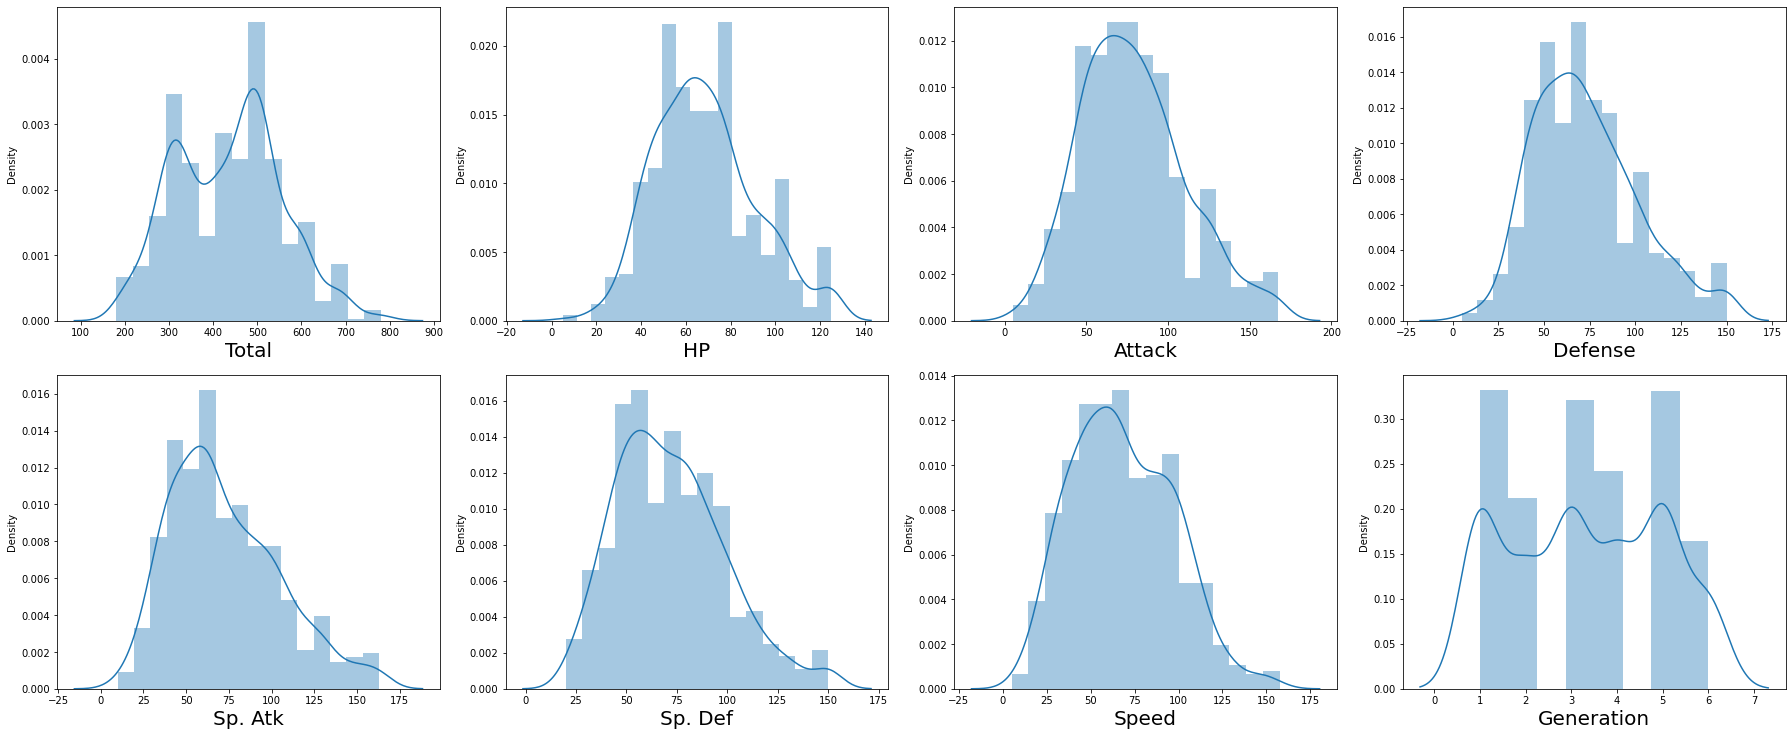

In [788]:
# visualising distribution of the data
plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1


for column in ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", 'Generation']:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(pokemon[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the graph,
Total col is not normally distributed
HP, Attack, Defense, Sp.Atk, Sp.Def col are normally distributed with right skewed

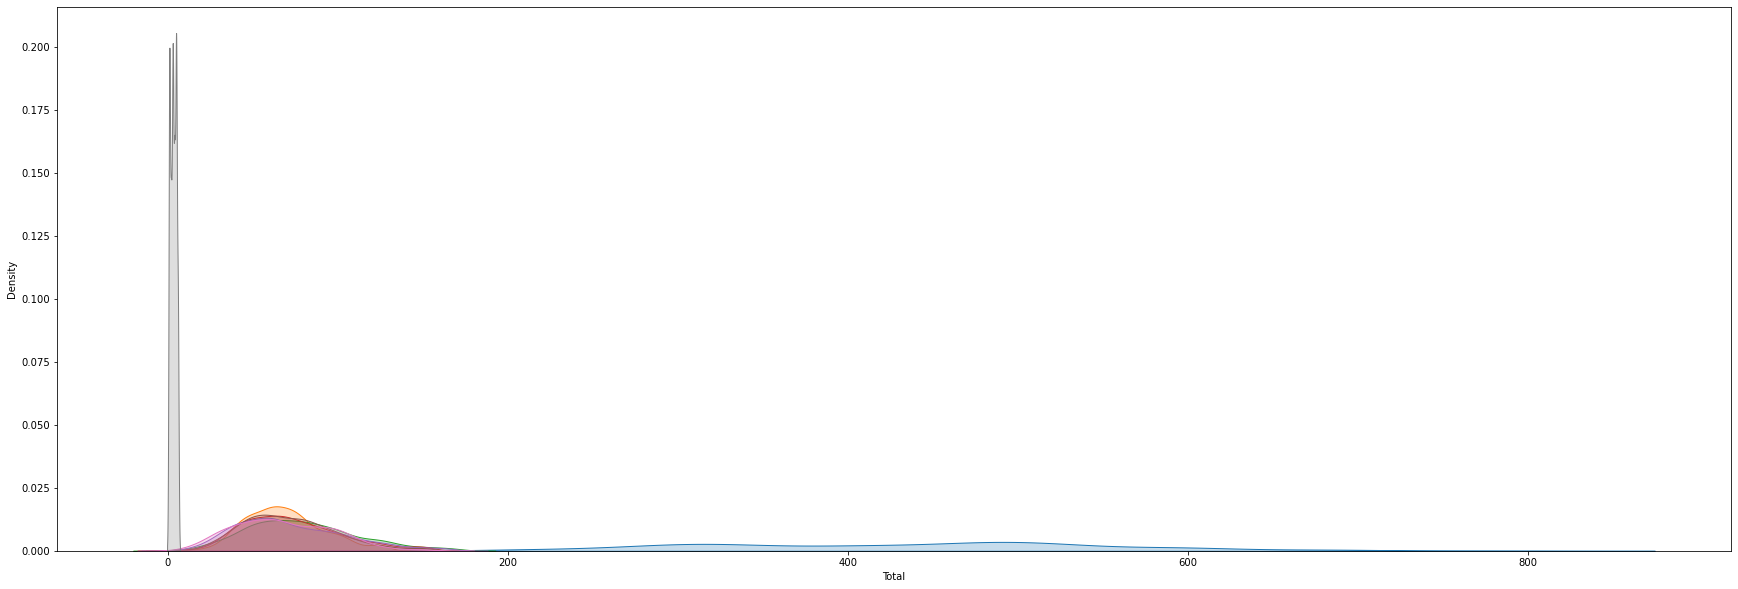

In [789]:
plt.figure(figsize=(30, 10))
for column in ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", 'Generation']:
    sns.kdeplot(pokemon[column], shade=True)
plt.show()

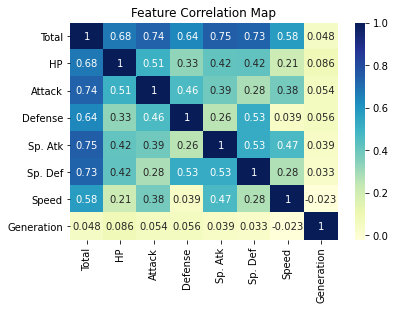

In [790]:
#correlation_matrix
Skills = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
sns.heatmap(pokemon[Skills].corr(),cmap="YlGnBu", annot=True);
plt.title("Feature Correlation Map");

From the graph, 
There is a high correlation of Total col with Attack, Sp.Atk and Sp.Def cols

In [791]:
# unique values of Type1
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [792]:
# scale the data
from sklearn.preprocessing import StandardScaler

In [793]:
# apply scaling
scaler = StandardScaler()
pokemon_scaled = scaler.fit_transform(pokemon[Skills])
pokemon_scaled

array([[-0.97676549, -1.04099298, -0.93056037, ..., -0.24791446,
        -0.80339398, -1.39963712],
       [-0.25108843, -0.37688263, -0.52594353, ...,  0.30711791,
        -0.28499167, -1.39963712],
       [ 0.74984544,  0.50859785,  0.09654391, ...,  1.04716106,
         0.40621141, -1.39963712],
       ...,
       [ 1.37542912,  0.50859785,  0.96802633, ...,  2.1572258 ,
         0.06060987,  1.61195431],
       [ 2.04271837,  0.50859785,  2.52424494, ...,  2.1572258 ,
         0.40621141,  1.61195431],
       [ 1.37542912,  0.50859785,  0.96802633, ...,  0.67713949,
         0.06060987,  1.61195431]])

In [794]:
# define kmeans func
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init="k-means++", random_state=0)
    km.fit_predict(pokemon[Skills])
    wcss.append(km.inertia_)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [795]:
# within cluster sum of sqaures
wcss

[15490417.120859366,
 6098480.986654929,
 4004151.8778197533,
 3229523.7823023554,
 2881210.084980566,
 2570655.101364005,
 2362495.4378123386,
 2218303.6375652566,
 2115974.332853517,
 2037865.5953864232]

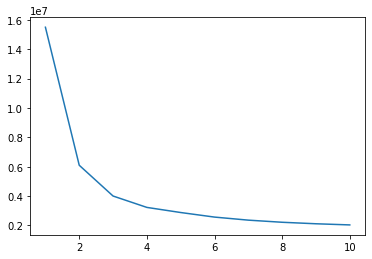

In [796]:
# elbow plot
plt.plot(range(1, 11), wcss)

From the graph, at 4 there no much steep in the curve, so we can consider 4 no of clusters

In [797]:
# import kmeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = km.fit_predict(pokemon_scaled)

In [798]:
X = np.array(pokemon_scaled)

Text(0, 0.5, 'Density')

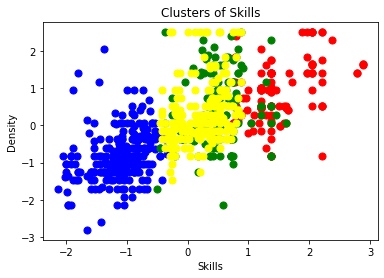

In [799]:
# visualise clusters
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=50, c='red', label='Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=50, c='blue', label='Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=50, c='green', label='Cluster3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=50, c='yellow', label='Cluster4')

plt.title('Clusters of Skills')
plt.xlabel('Skills')
plt.ylabel('Density')

From the graph we can interpret that,
Cluster 1 (red color) have high performing skills but are less in number
Cluster 3 (green color) have immediate performing skills over Cluster 4 (yellow color) however a both are close enough
Cluster 2 (blue color) have the least performing skills among all 

In [800]:
# add cluster to original data
pokemon['KMeans_Clusters'] = pd.Series(y_kmeans)
pokemon

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,KMeans_Clusters
0,Grass,318,45.0,49.0,49.0,65.000,65.0,45.0,1,0,1
1,Grass,405,60.0,62.0,63.0,80.000,80.0,60.0,1,0,3
2,Grass,525,80.0,82.0,83.0,100.000,100.0,80.0,1,0,3
3,Grass,625,80.0,100.0,123.0,122.000,120.0,80.0,1,0,0
4,Fire,309,39.0,52.0,43.0,60.000,50.0,65.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,600,50.0,100.0,150.0,100.000,150.0,50.0,6,1,2
796,Rock,700,50.0,160.0,110.0,160.000,110.0,110.0,6,1,0
797,Psychic,600,80.0,110.0,60.0,150.000,130.0,70.0,6,1,0
798,Psychic,680,80.0,160.0,60.0,162.875,130.0,80.0,6,1,0


In [801]:
# no of pokemons in each of the four clusters
pokemon['KMeans_Clusters'].value_counts()

1    282
3    239
2    151
0    128
Name: KMeans_Clusters, dtype: int64

Text(0, 0.5, 'Euclidean Distance')

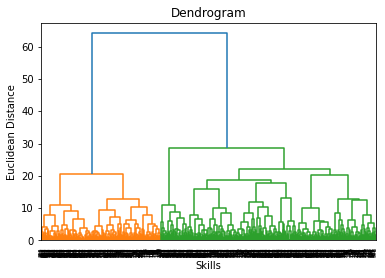

In [802]:
# dendrogram for hierarchical clustering
import scipy.cluster.hierarchy as shc
dendrogram = shc.dendrogram(sch.linkage(pokemon_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Skills')
plt.ylabel('Euclidean Distance')

From the graph, the longest standing line is blue upon bifurcation leaves us with 2 clusters

In [803]:
# import agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

In [804]:
# apply the model
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage='complete')
y_hc = hc.fit_predict(pokemon_scaled)
y_hc

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [805]:
# add cluster to original data
pokemon['Hierarchical_Clusters'] = pd.Series(y_kmeans)
pokemon

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,KMeans_Clusters,Hierarchical_Clusters
0,Grass,318,45.0,49.0,49.0,65.000,65.0,45.0,1,0,1,1
1,Grass,405,60.0,62.0,63.0,80.000,80.0,60.0,1,0,3,3
2,Grass,525,80.0,82.0,83.0,100.000,100.0,80.0,1,0,3,3
3,Grass,625,80.0,100.0,123.0,122.000,120.0,80.0,1,0,0,0
4,Fire,309,39.0,52.0,43.0,60.000,50.0,65.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,600,50.0,100.0,150.0,100.000,150.0,50.0,6,1,2,2
796,Rock,700,50.0,160.0,110.0,160.000,110.0,110.0,6,1,0,0
797,Psychic,600,80.0,110.0,60.0,150.000,130.0,70.0,6,1,0,0
798,Psychic,680,80.0,160.0,60.0,162.875,130.0,80.0,6,1,0,0


In [806]:
# no of pokemons in each of the four clusters
pokemon['Hierarchical_Clusters'].value_counts()

1    282
3    239
2    151
0    128
Name: Hierarchical_Clusters, dtype: int64

After studying the pokemon dataset thoroughly, some conclusions are made as follows

1. There are approximately 325 pokemons with an attack between 50 - 75.
2. There is a majority of pokemons of the 4th, 5th and 6th generation having an attack from 50 - 100 and a defense of 50 - 100.
3. There are very few (approx. 8 % - 65) Legendary pokemons from the 800 pokemons present in the dataframe.
4. Among the 800 Pokemon, we can observe that there are maximum Water Type Pokemon (112 - 14%).
5. To ensure that the numerical variables are not skewed, it’s crucial to remove or impute the missing values and outliers. We imputed the missing values using IQR method.
6. Feature engineering and exploratory data analysis were performed to gather more meaningful information from the data.
7. Derived variables were created using the existing features and skewed variables were scaled.
8. Apart from this, various data visualization, like box plot, dist plot, heat map, pair plot, correlation matrix and scatter plot were created to understand the uni-variate distribution and multi-variate relationship of the data.